<a href="https://colab.research.google.com/github/Kat-ies/NAM_bsu/blob/lab-2/5%20sem/lab%202/NA_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 2

## Постановка задачи

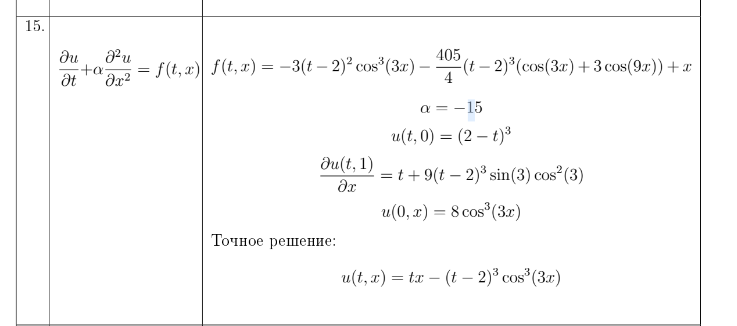

## Теоретическая часть
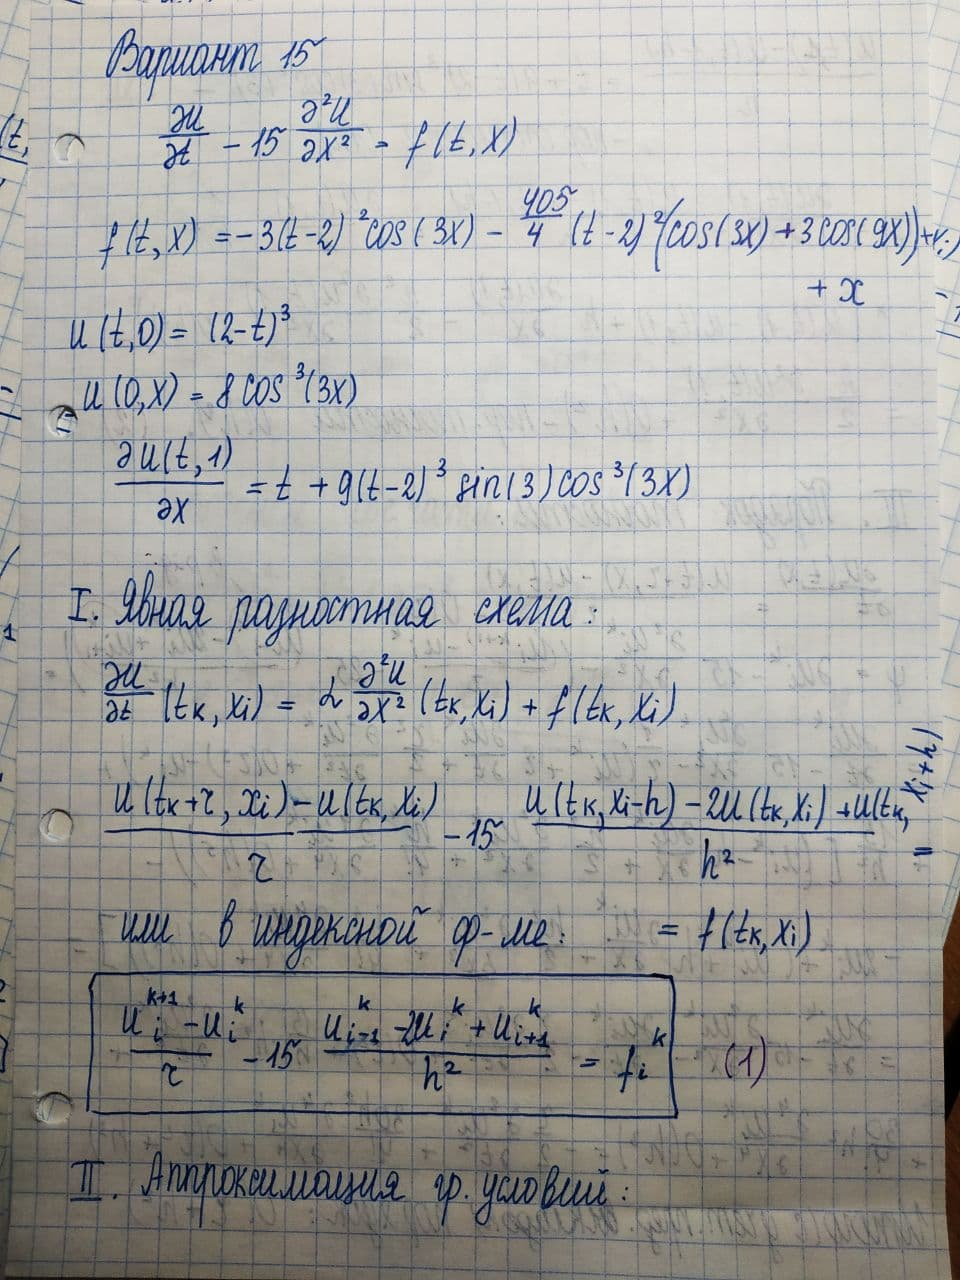

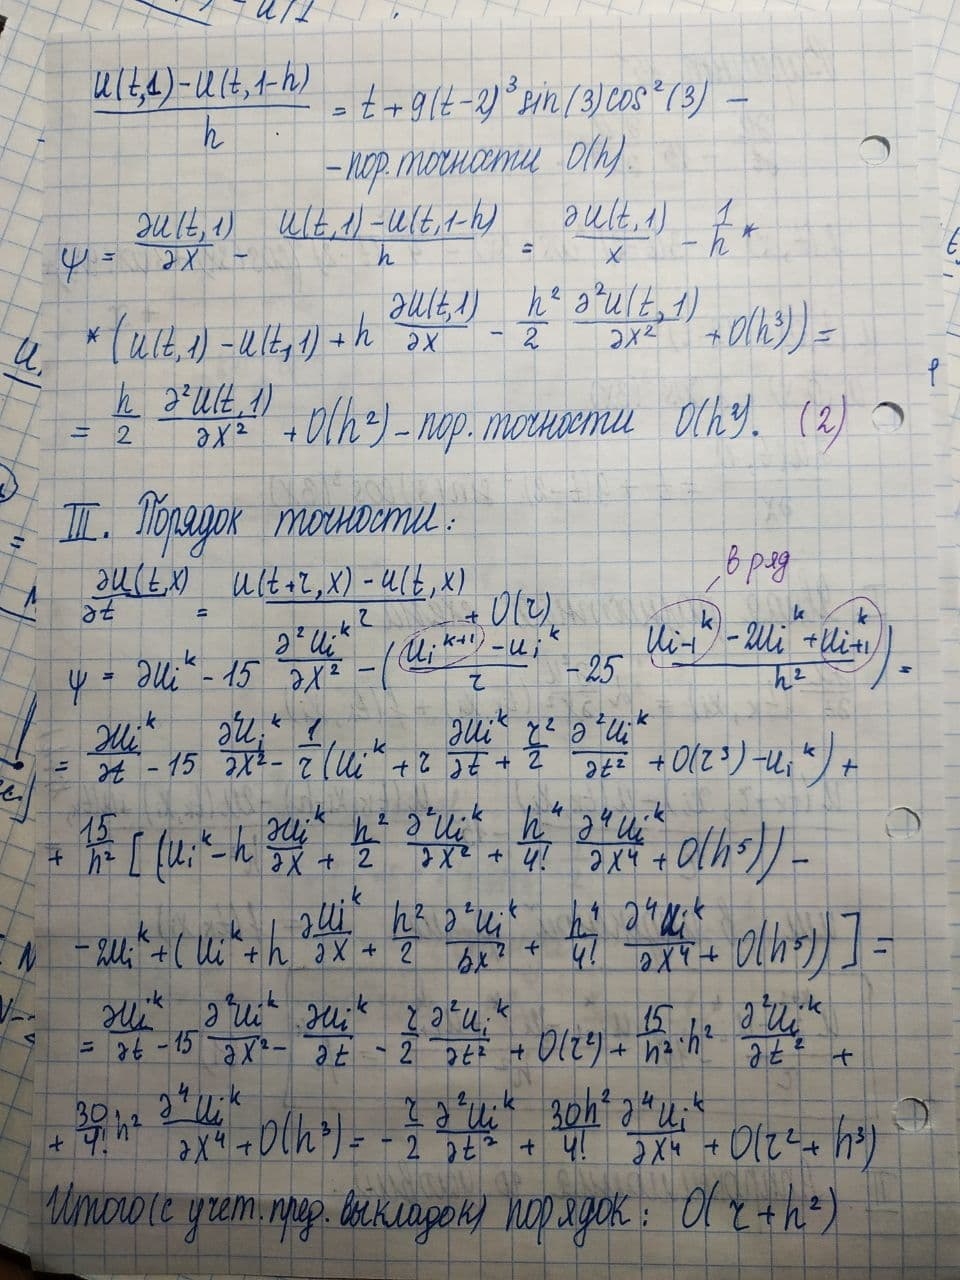

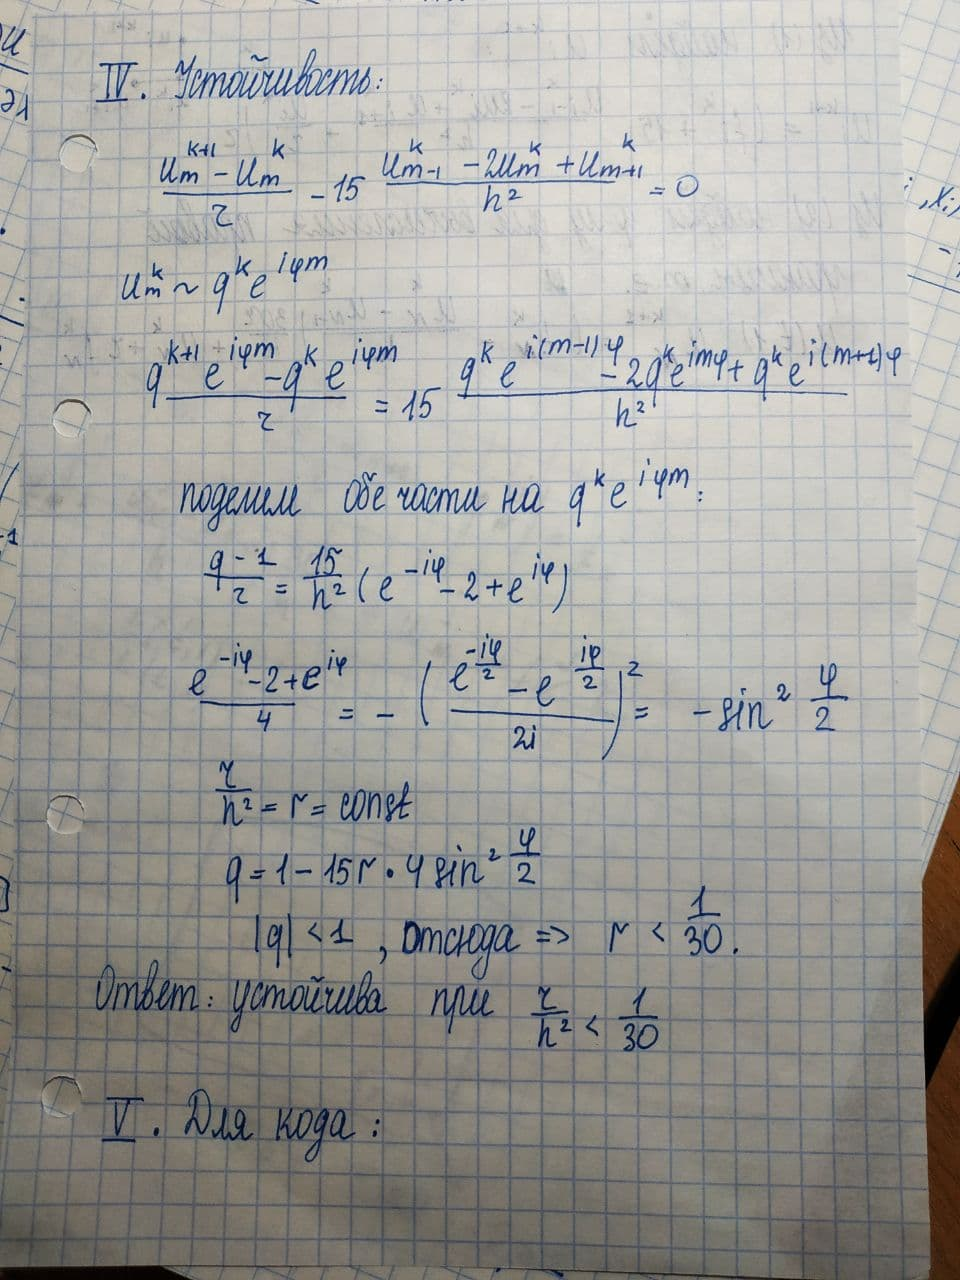

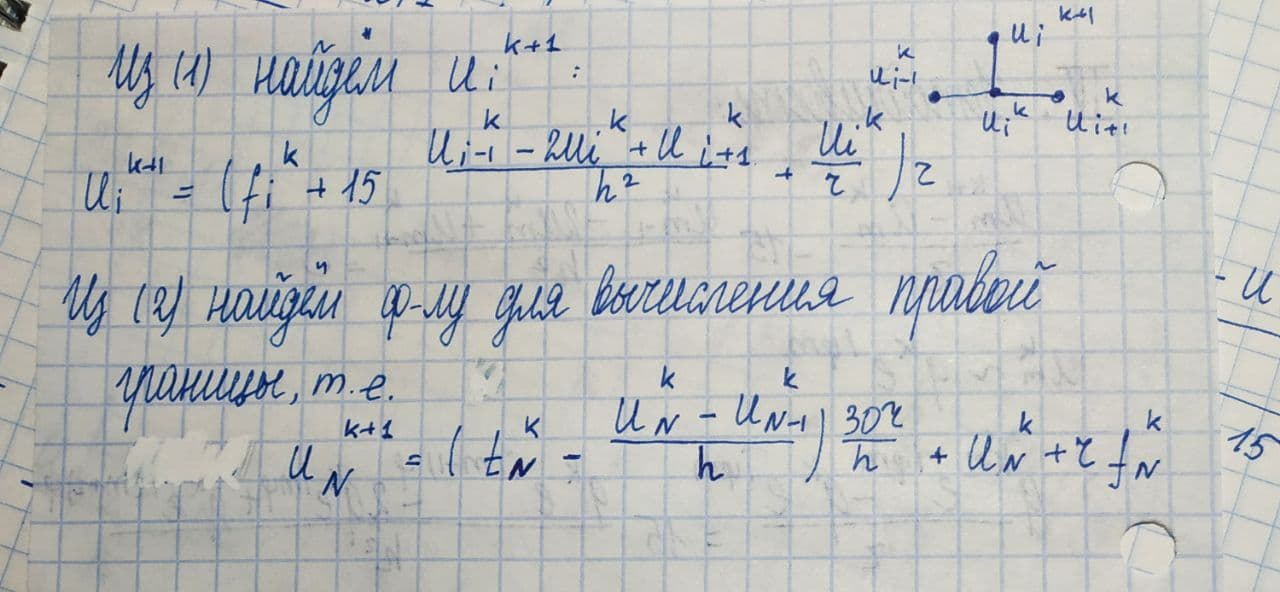

## Практическая часть


In [ ]:
#используемые функции
def f1(x):
    return 8*np.cos(3*x)**3

def f2(t):
    return (2-t)**3

def f3(t):
    return t + 9*(t-2)**3 * np.sin(3) * np.cos(3)**2

def f(t, x):
    return -3*(t-2)**2 * np.cos(3*x)**3 - 405/4 * (t-2)**3 * (np.cos(3*x)+3*np.cos(9*x)) + x

def u(t,x):
    return t*x - (t-2)**3 * np.cos(3*x)**3

In [ ]:
#3D график построенного решения
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
 
def plot_surf(x,y,U):
    X, Y = np.meshgrid(x, y)
    Z = np.array(U, dtype=np.float)
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title('N= '+str(len(x)) ) # set title
    ax.plot_surface(X, Y, Z)

In [ ]:
#Вычисление разностной схемы
def cacl_scheme(U, x, t):
    N = len(t) 
    M = len(x)

    for i, elems in enumerate(x):
      U[N-1][i] = f1(elems)

    for i, elems in enumerate(t):
       U[N-1-i][0] = f2(elems)

    for i in range (N-2, -1, -1):
        for j in range (1, M-1):
            U[i][j] = (f(t[N-1-i-1],x[j]) + 15 / h_x**2 * (U[i+1][j-1] -2*U[i+1][j]+ U[i+1][j+1]))*h_tau + U[i+1][j]
        U[i][M-1] = 30*h_tau/h_x*(f3(t[N-1-i-1])-1/h_x*(U[i+1][M-1]-U[i+1][M-2]))+ U[i+1][M-1] + h_tau*f(x[M-1], t[N-2-i])


N =  10
Calculation time:  0.29477524757385254


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


Error:  0.13282309136224596
N =  20
Calculation time:  2.7133543491363525
Error:  0.08498236843020568
N =  50
Calculation time:  43.6755907535553
Error:  0.038885744366222275


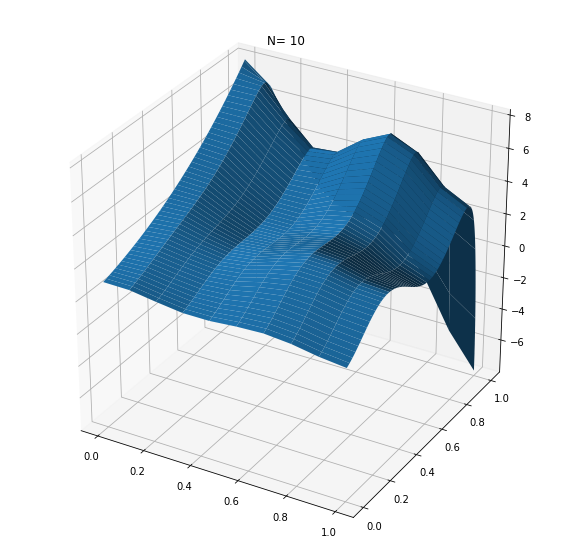

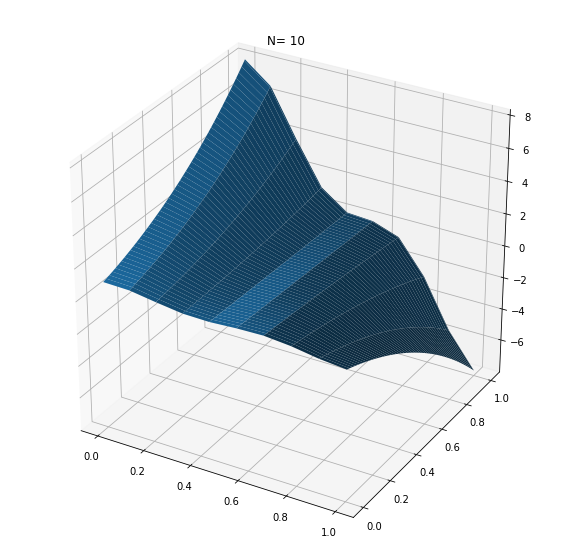

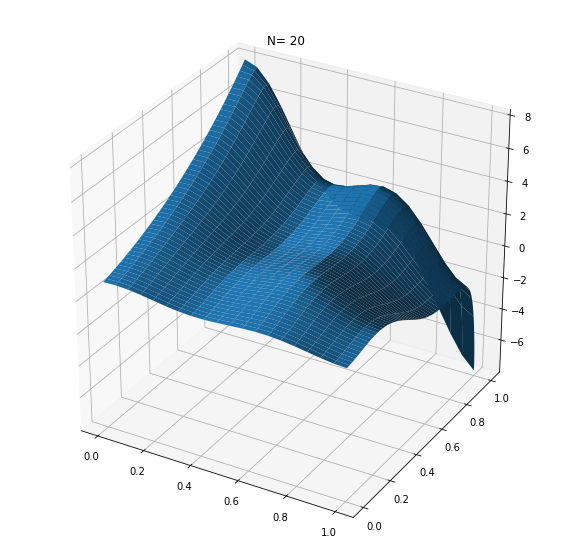

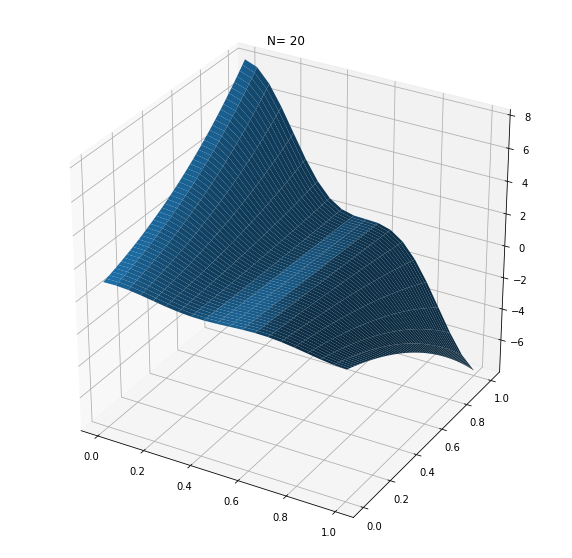

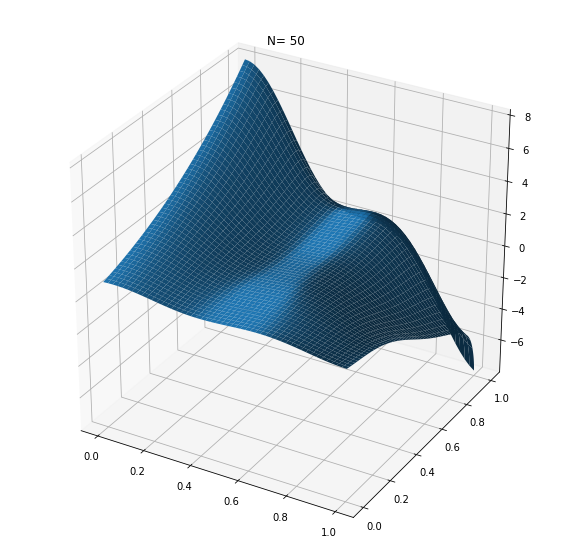

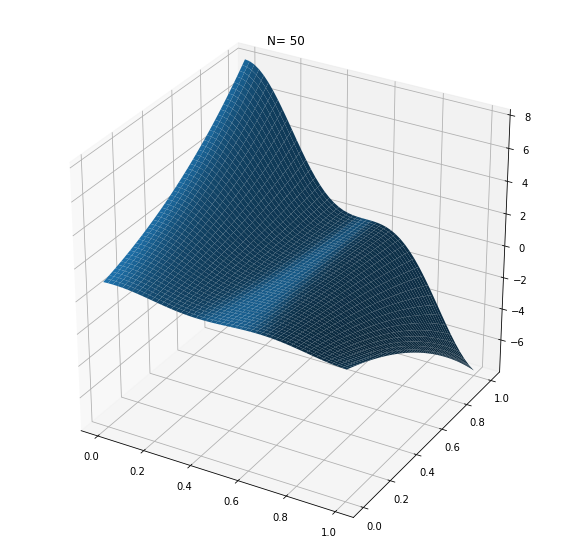

In [ ]:
import time
import numpy as np

#инициализация переменных
n = [10, 20, 50]
r = 1/31

for N in n:
    h_x = 1/(N-1)
    h_tau = h_x**2 * r


    x = np.arange(0, 1, h_x)
    t = np.arange(0, 1, h_tau)
    if len(x) != 50:
        x = np.append(x, 1)
    t = np.append(t, 1)

    U = np.zeros((len(t), len(x)))

    t0 = time.time()
    cacl_scheme(U, x, t)
    t1 = time.time()
    print('N = ', N)
    print('Calculation time: ', t1-t0)

    plot_surf(x,t,U)
    F = np.zeros((len(t), len(x)))
    for i,elem1 in enumerate(t):
        for j, elem2 in enumerate(x):
            F[len(t)-1-i][j] = u(elem1,elem2)
    plot_surf(x,t,F)

    err = []
    #для вычисления точности посмотрим на значения, к примеру, в момент времени  t = 1
    for i in range(0, len(x)):
        err= max(abs (F[0][i] - U[0][i]),err)
    print("Error: ", err)
        